In [34]:
# automatic reloading of modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import os
import openai
import pandas as pd

In [36]:
# print the entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# also print the entire content of a dfs column
pd.set_option('display.max_colwidth', None)

In [44]:
from zero_shot_models.cgpt import *

In [38]:
path_to_data = '../data/liar_dataset/test.tsv'
test = read_data(path_to_data)

path_to_data = '../data/liar_dataset/valid.tsv'
valid = read_data(path_to_data)


In [39]:
labels_map = {'pants-fire': "false", 'false':"false", 'barely-true':"false", 'half-true':"false", 'mostly-true':"true", 'true':"true"}

In [40]:
test["label"] = test["label"].map(labels_map)
valid["label"] = valid["label"].map(labels_map)

In [41]:
valid.label.value_counts()

false    864
true     420
Name: label, dtype: int64

In [42]:
test.label.value_counts()

false    818
true     449
Name: label, dtype: int64

In [46]:
print(get_prompt(test.head(1).statement.values[0], binary=True))

Classify the accuracy of the following statement: 'Building a wall on the U.S.-Mexico border will take literally years.'
You can only answer with one of the following categories to describe the accuracy of the claim: false, true. You response should be of the following structure:[label]: [explanation]


In [47]:
calc_price(test, get_prompt(""),token_price=0.02/1000 )

2.32824

In [48]:
openai.api_key = "SOME_KEY"

In [50]:
res = get_response(get_prompt(valid.head(1).statement.values[0], binary=True))

In [51]:
res

<OpenAIObject text_completion id=cmpl-6pwKWtfS3JSIV3A1dcjXx0qOKvj9X at 0x7fa6981375e0> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\nTrue: The number of Americans employed has decreased since the 1970s."
    }
  ],
  "created": 1677836968,
  "id": "cmpl-6pwKWtfS3JSIV3A1dcjXx0qOKvj9X",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 15,
    "prompt_tokens": 61,
    "total_tokens": 76
  }
}

In [53]:
get_label_and_explanation(res)

('true', 'The number of Americans employed has decreased since the 1970s.')

In [54]:
valid_results = get_label_and_explanation_from_df(valid, binary=True)
valid_results.to_csv('valid_cgpt_binary.csv')

In [55]:
test_results = get_label_and_explanation_from_df(test, binary=True)
test_results.to_csv('test_cgpt_binary.csv')

In [62]:
labels = ['false', 'true']

              precision    recall  f1-score   support

     abstain       0.00      0.00      0.00         0
       false       0.74      0.56      0.63       864
        true       0.39      0.58      0.47       420

    accuracy                           0.56      1284
   macro avg       0.38      0.38      0.37      1284
weighted avg       0.62      0.56      0.58      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

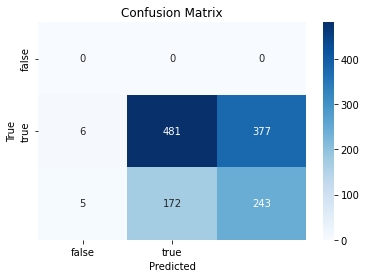

In [64]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_results.label, valid_results.prediction, zero_division=0))
cm = confusion_matrix(valid_results.label, valid_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

     abstain       0.00      0.00      0.00         0
       false       0.76      0.55      0.64       818
   half-true       0.00      0.00      0.00         0
        true       0.46      0.68      0.55       449

    accuracy                           0.60      1267
   macro avg       0.31      0.31      0.30      1267
weighted avg       0.66      0.60      0.61      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

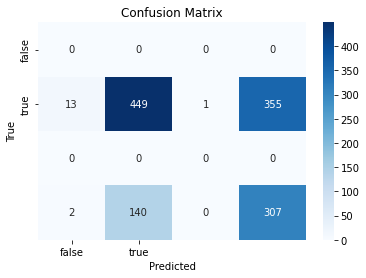

In [65]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(test_results.label, test_results.prediction, zero_division=0))
cm = confusion_matrix(test_results.label, test_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Results overview

In [66]:
# import pandas, np, matplotlib, and from sklearn import classification report, accuracy, f1, confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [67]:
valid_true = valid_results.label.values
valid_pred = valid_results.prediction.values

test_true = test_results.label.values
test_pred = test_results.prediction.values

In [68]:
np.unique(valid_pred, return_counts=True)

(array(['abstain', 'false', 'true'], dtype=object), array([ 11, 653, 620]))

In [69]:
np.unique(test_pred, return_counts=True)

(array(['abstain', 'false', 'half-true', 'true'], dtype=object),
 array([ 15, 589,   1, 662]))

              precision    recall  f1-score   support

     abstain       0.00      0.00      0.00         0
       false       0.74      0.56      0.63       864
        true       0.39      0.58      0.47       420

    accuracy                           0.56      1284
   macro avg       0.38      0.38      0.37      1284
weighted avg       0.62      0.56      0.58      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

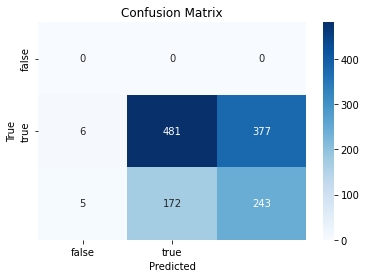

In [70]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_true, valid_pred, zero_division=0))
cm = confusion_matrix(valid_true, valid_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

     abstain       0.00      0.00      0.00         0
       false       0.76      0.55      0.64       818
   half-true       0.00      0.00      0.00         0
        true       0.46      0.68      0.55       449

    accuracy                           0.60      1267
   macro avg       0.31      0.31      0.30      1267
weighted avg       0.66      0.60      0.61      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

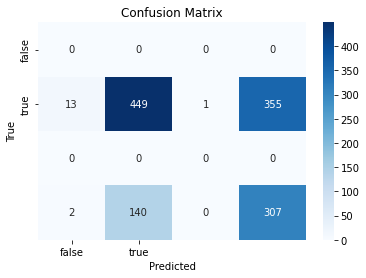

In [71]:
# print classification report and confusion matrix as a heatmap for test set 
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
# print all content in pd column
pd.set_option('display.max_colwidth', None)

In [73]:
test_results.loc[test_results.prediction == 'abstain',['statement','label','prediction','explanation']].T

,14,20,32,151,154,295,459,726,840,852,860,948,1094,1169,1258
statement,On residency requirements for public workers,There have not been any public safety issues in cities that allow transgender people to use the bathroom of the gender they identify as.,On which team hes rooting for in the World Series.,Eighty percent of the American people support an approach (to federal budget problems) that includes revenues and includes cuts.,On pay for fired Milwaukee police officers,On whether the government should bail out insurance giant AIG.,On redistricting.,Metro on whether it could use bond money for restoration.,Ohioans want an end to pay-to-play politics.,On subsidies for ethanol production.,Says Bruce Starr broke the law by letting lobbyists wine and dine him in Maui.,On Donald Trumps track record in business,Forty-five percent of doctors say theyll quit if health care reform passes.,On a cap-and-trade plan.,On offshore drilling.
label,false,true,false,true,false,false,false,false,false,false,false,false,false,false,false
prediction,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain
explanation,"Without more information, it is not possible to determine the accuracy of this statement.",The accuracy of the statement cannot be determined due to a lack of evidence.,This statement does not make a claim that can be assessed for accuracy.,The accuracy of the statement cannot be determined without further evidence.,The accuracy of the statement cannot be determined without more information.,"The statement is an opinion, not a fact, and therefore cannot be classified as either true or false.",It is difficult to classify the accuracy of this statement without more information.,It is not possible to classify the accuracy of this statement without additional context.,The accuracy of this statement cannot be determined without further evidence.,The accuracy of the statement cannot be determined without further context.,There is not enough information provided to determine the accuracy of the statement.,It is not possible to classify the accuracy of this statement without more information.,The statement does not provide any evidence to back up the claim.,The accuracy of this statement cannot be determined without more information.,"Without more information, it is impossible to classify the accuracy of the statement."


              precision    recall  f1-score   support

       false       0.67      1.00      0.80       864
        true       0.00      0.00      0.00       420

    accuracy                           0.67      1284
   macro avg       0.34      0.50      0.40      1284
weighted avg       0.45      0.67      0.54      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

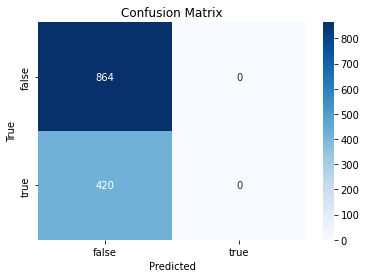

In [74]:
# Get the most used label in valid set and use it as a baseline. 
majority_label = np.unique(valid_true, return_counts=True)[0][np.argmax(np.unique(valid_true, return_counts=True)[1])]
valid_baseline = [majority_label for i in range(len(valid_true))]

# Get the most used label in test set and use it as a baseline.
majority_label = np.unique(test_true, return_counts=True)[0][np.argmax(np.unique(test_true, return_counts=True)[1])]
test_baseline = [majority_label for i in range(len(test_true))]

# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_true, valid_baseline, zero_division=0))
cm = confusion_matrix(valid_true, valid_baseline)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



              precision    recall  f1-score   support

       false       0.65      1.00      0.78       818
        true       0.00      0.00      0.00       449

    accuracy                           0.65      1267
   macro avg       0.32      0.50      0.39      1267
weighted avg       0.42      0.65      0.51      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

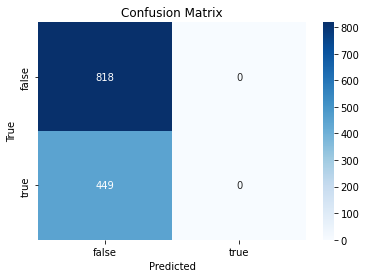

In [75]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_true, test_baseline, zero_division=0))
cm = confusion_matrix(test_true, test_baseline)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Embeddings zero-shot model

In [11]:
from zero_shot_models.embeddings import get_spacy_predictions

In [18]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1284 non-null   object
 1   label                1284 non-null   object
 2   statement            1284 non-null   object
 3   subject              1284 non-null   object
 4   speaker              1284 non-null   object
 5   speaker_job          939 non-null    object
 6   state_info           1005 non-null   object
 7   party                1284 non-null   object
 8   barely_true_count    1284 non-null   int64 
 9   false_count          1284 non-null   int64 
 10  half_true_count      1284 non-null   int64 
 11  mostly_true_count    1284 non-null   int64 
 12  pants_on_fire_count  1284 non-null   int64 
 13  context              1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [12]:
labels = ['true', 'false']

In [13]:
valid_embeddings_results = get_spacy_predictions(valid.copy(), "statement", labels)

In [14]:
valid_embeddings_results.head()

,prediction,max_score,id,label,statement,subject,speaker,speaker_job,state_info,party,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context
0,true,0.576041,12134.json,false,We have less Americans working now than in the 70s.,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,true,0.628910,238.json,false,"When Obama was sworn into office, he DID NOT use the Holy Bible, but instead the Kuran (Their equivalency to our Bible, but very different beliefs).","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,true,0.560956,7891.json,false,Says Having organizations parading as being social welfare organizations and then being involved in the political combat harkens back to why the statute a hundred years ago said that they were prohibited.,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,true,0.501756,8169.json,false,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,true,0.572722,929.json,false,"On attacks by Republicans that various programs in the economic stimulus plan are not stimulative, ""If you add all that stuff up, it accounts for less than 1 percent of the overall package.""","economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [15]:
test_embeddings_results = get_spacy_predictions(test.copy(), "statement", labels)

              precision    recall  f1-score   support

       false       0.60      0.00      0.01       864
        true       0.33      1.00      0.49       420

    accuracy                           0.33      1284
   macro avg       0.46      0.50      0.25      1284
weighted avg       0.51      0.33      0.17      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

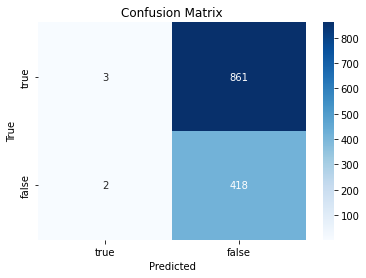

In [24]:
# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_embeddings_results.label, valid_embeddings_results.prediction, zero_division=0))
cm = confusion_matrix(valid_embeddings_results.label, valid_embeddings_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       1.00      0.01      0.02       818
        true       0.36      1.00      0.53       449

    accuracy                           0.36      1267
   macro avg       0.68      0.50      0.27      1267
weighted avg       0.77      0.36      0.20      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

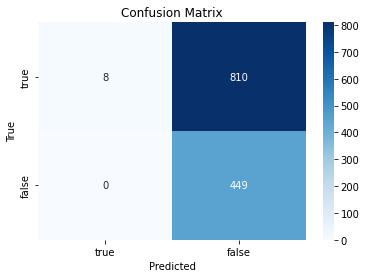

In [25]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_embeddings_results.label, test_embeddings_results.prediction, zero_division=0))
cm = confusion_matrix(test_embeddings_results.label, test_embeddings_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with sentence-transformer NLI models

In [18]:
from zero_shot_models.nli_sentencetransformer import get_nli_transformer_prediction

In [21]:
labels = ['true', 'false']

In [22]:
valid_nli_results = get_nli_transformer_prediction(valid.copy(), "statement", labels)
valid_nli_results.to_csv('valid_nli_results_binary.csv', index=False)


100%|██████████| 1284/1284 [02:26<00:00,  8.76it/s]


In [23]:

test_nli_results = get_nli_transformer_prediction(test.copy(), "statement", labels)
test_nli_results.to_csv('test_nli_results_binary.csv', index=False)


100%|██████████| 1267/1267 [02:07<00:00,  9.92it/s]


              precision    recall  f1-score   support

       false       0.68      0.79      0.73       864
        true       0.36      0.24      0.29       420

    accuracy                           0.61      1284
   macro avg       0.52      0.52      0.51      1284
weighted avg       0.58      0.61      0.59      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

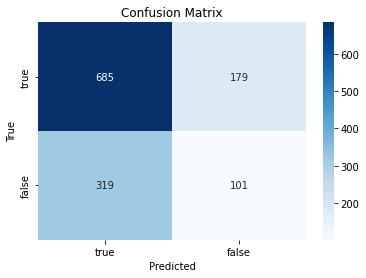

In [26]:
# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_nli_results.label, valid_nli_results.prediction, zero_division=0))
cm = confusion_matrix(valid_nli_results.label, valid_nli_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       0.66      0.79      0.72       818
        true       0.41      0.27      0.32       449

    accuracy                           0.60      1267
   macro avg       0.54      0.53      0.52      1267
weighted avg       0.57      0.60      0.58      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

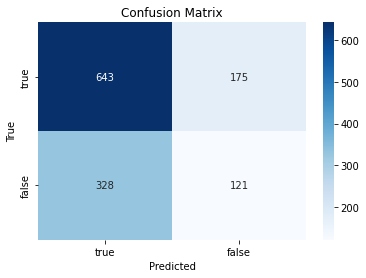

In [27]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_nli_results.label, test_nli_results.prediction, zero_division=0))
cm = confusion_matrix(test_nli_results.label, test_nli_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with Sentence transformer

In [28]:
from zero_shot_models.transfomer import get_transformer_prediction

In [29]:
model_name = 'cross-encoder/nli-distilroberta-base'
valid_sentransformer_results = get_transformer_prediction(valid.copy(), "statement", labels, model_name)
valid_sentransformer_results.to_csv('valid_sentransformer_results_binary.csv', index=False)


100%|██████████| 1284/1284 [02:32<00:00,  8.44it/s]


In [30]:
test_sentransformer_results = get_transformer_prediction(test.copy(), "statement", labels, model_name)
test_sentransformer_results.to_csv('test_sentransformer_results_binary.csv', index=False)


100%|██████████| 1267/1267 [02:20<00:00,  9.00it/s]


# Zero-shot classification with transformer models

In [31]:
from zero_shot_models.transfomer import get_transformer_prediction

In [32]:
valid_transformer_results = get_transformer_prediction(valid.copy(), "statement", labels)
valid_transformer_results.to_csv('valid_transformer_results_binary.csv', index=False)

100%|██████████| 1284/1284 [16:26<00:00,  1.30it/s]


In [33]:
test_transformer_results = get_transformer_prediction(test.copy(), "statement", labels)
test_transformer_results.to_csv('test_transformer_results_binary.csv', index=False)

100%|██████████| 1267/1267 [16:37<00:00,  1.27it/s]
